<a href="https://colab.research.google.com/github/KOMPALALOKESH/project-practice/blob/main/AutoPilot_in_dataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.2/149.2 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.8/775.8 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.0/424.0 KB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.4/386.4 KB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.9 MB/s eta 0:00:00
  Attempting uninstall: tornado
    Found existing installation: tornado 6.0.4
    Uninstalling tornado-6.0.4:
      Successfully uninstalled tornado-6.0.4
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 2.0.10
    Uninstalling prompt-toolkit-2.0.10:
      Successfully uninstalled prompt-toolkit-2.0.10
  Attempting uninstall: ipython
    Found existing installation: ipython 7.9.0
    Uninstalling ipython-7.9.0:
      Successfully uninstalled ipython-7.9.0

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor # to work this code restart runtime

In [ ]:
df = pd.read_csv('insurance.csv')
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [ ]:
unique_regions = df['region'].unique()
unique_regions,len(unique_regions)

(array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object), 4)

## **EDA**

In [ ]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
group_by_regions = df.groupby('region').mean().round(3)
group_by_regions

,age,bmi,children,charges
region,,,,
northeast,39.269,29.174,1.046,13406.385
northwest,39.197,29.200,1.148,12417.575
southeast,38.940,33.356,1.049,14735.411
southwest,39.455,30.597,1.142,12346.937


In [ ]:
group_by_age = df.groupby('age').mean()
group_by_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


In [ ]:
group_by_age.info(),df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 18 to 64
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bmi       47 non-null     float64
 1   children  47 non-null     float64
 2   charges   47 non-null     float64
dtypes: float64(3)
memory usage: 1.5 KB


(None,
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object'))

# **Data Visualization**

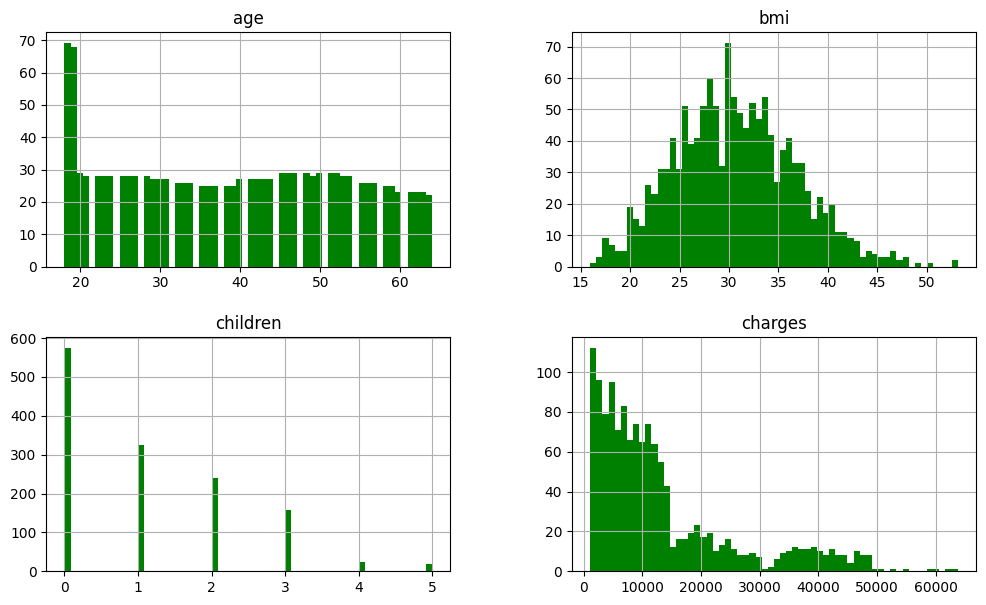

In [ ]:
df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].hist(bins=60,color='green',figsize=(12,7))
plt.show()

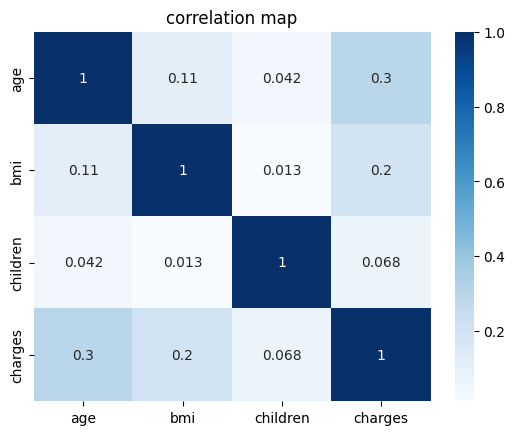

In [ ]:
correlation = df.corr()
sns.heatmap(correlation,annot=True,cmap='Blues')
plt.title('correlation map')
plt.show()

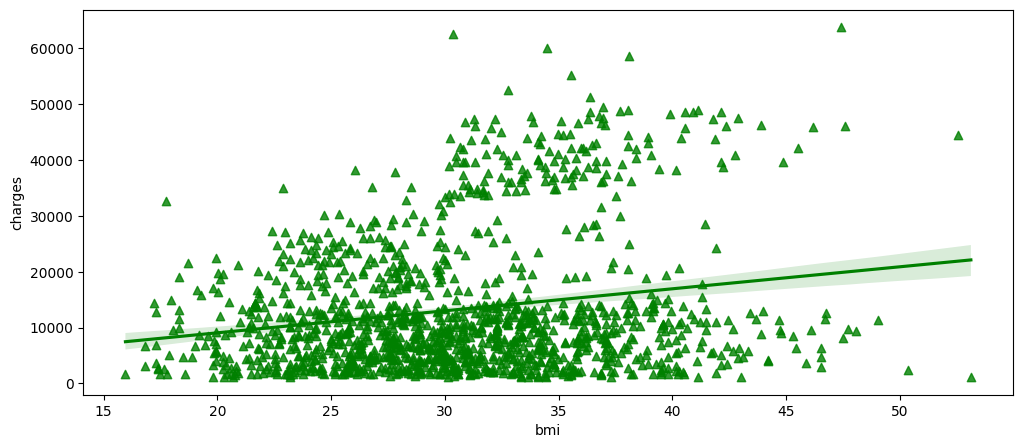

In [33]:
plt.figure(figsize=(12,5))
sns.regplot(x='bmi',y='charges',data=df,marker='^',color='green') # regplot is used to plot data and a linear regression model fit
plt.show()

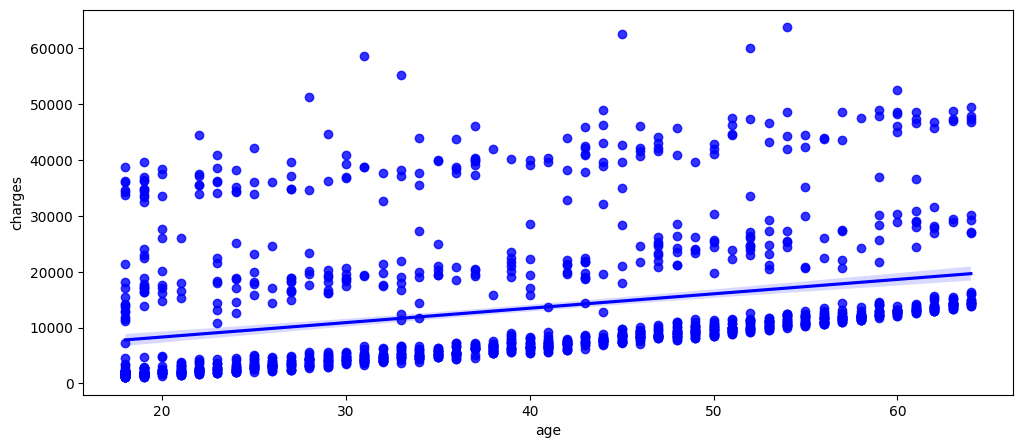

In [32]:
plt.figure(figsize=(12,5))
sns.regplot(x='age',y='charges',data=df,marker='o',color='blue') # regplot is used to plot data and a linear regression model fit
plt.show()

# **Autogluon**

In [ ]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

from sklearn.model_selection import train_test_split
X_train,x_test = train_test_split(df,test_size=0.2)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region,charges
1255,42,female,37.900,0,no,southwest,6474.01300
296,19,male,27.700,0,yes,southwest,16297.84600
3,33,male,22.705,0,no,northwest,21984.47061
403,49,male,32.300,3,no,northwest,10269.46000
610,47,female,29.370,1,no,southeast,8547.69130
...,...,...,...,...,...,...,...
544,54,male,30.210,0,no,northwest,10231.49990
882,21,female,22.135,0,no,northeast,2585.85065
955,31,male,39.490,1,no,southeast,3875.73410
276,19,male,20.615,2,no,northwest,2803.69785


In [ ]:
x_test

,age,sex,bmi,children,smoker,region,charges
470,27,male,32.670,0,no,southeast,2497.03830
193,56,female,26.600,1,no,northwest,12044.34200
1187,62,female,32.680,0,no,northwest,13844.79720
543,54,female,47.410,0,yes,southeast,63770.42801
348,36,female,29.920,1,no,southeast,5478.03680
...,...,...,...,...,...,...,...
1063,36,male,28.595,3,no,northwest,6548.19505
447,56,female,25.650,0,no,northwest,11454.02150
456,55,female,30.140,2,no,southeast,11881.96960
23,34,female,31.920,1,yes,northeast,37701.87680


In [ ]:
autogluon_predictor = TabularPredictor(label='charges',problem_type='regression'
                      ,eval_metric='r2').fit(train_data=X_train,time_limit=200,presets='best_quality') # presets='optimize for deployment'

No path specified. Models will be saved in: "AutogluonModels/ag-20230126_063721/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20230126_063721/"
AutoGluon Version:  0.6.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    1070
Train Data Columns: 6
Label Column: charges
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11756.48 MB
	Train Data (Original)  Memory Usage: 0.23 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Not

In [ ]:
autogluon_predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.855906       0.550338   90.536473                0.000906           0.352173            2       True         10
1          CatBoost_BAG_L1   0.854334       0.041418   21.586130                0.041418          21.586130            1       True          6
2      WeightedEnsemble_L3   0.853456       0.999424  164.660752                0.001151           0.233733            3       True         13
3        LightGBMXT_BAG_L2   0.853266       0.904684  138.174608                0.124820          22.158492            2       True         11
4        LightGBMXT_BAG_L1   0.847396       0.065072   25.115239                0.065072          25.115239            1       True          3
5          LightGBM_BAG_L1   0.846826       0.071467   20.575635                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.01884537019385424,
  'KNeighborsDist_BAG_L1': -0.13372186741069525,
  'LightGBMXT_BAG_L1': 0.8473958388024797,
  'LightGBM_BAG_L1': 0.8468259570353048,
  'RandomForestMSE_BAG_L1': 0.8305785928733276,
  'CatBoost_BAG_L1': 0.8543342351134368,


In [ ]:
# in the above model predictions weighted ensemble _L2 gives more score to predict

In [27]:
autogluon_predictor.leaderboard()

                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.855906       0.550338   90.536473                0.000906           0.352173            2       True         10
1          CatBoost_BAG_L1   0.854334       0.041418   21.586130                0.041418          21.586130            1       True          6
2      WeightedEnsemble_L3   0.853456       0.999424  164.660752                0.001151           0.233733            3       True         13
3        LightGBMXT_BAG_L2   0.853266       0.904684  138.174608                0.124820          22.158492            2       True         11
4        LightGBMXT_BAG_L1   0.847396       0.065072   25.115239                0.065072          25.115239            1       True          3
5          LightGBM_BAG_L1   0.846826       0.071467   20.575635                0.071467          20.575635            1       True          4

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.855906,0.550338,90.536473,0.000906,0.352173,2,True,10
1,CatBoost_BAG_L1,0.854334,0.041418,21.586130,0.041418,21.586130,1,True,6
2,WeightedEnsemble_L3,0.853456,0.999424,164.660752,0.001151,0.233733,3,True,13
3,LightGBMXT_BAG_L2,0.853266,0.904684,138.174608,0.124820,22.158492,2,True,11
4,LightGBMXT_BAG_L1,0.847396,0.065072,25.115239,0.065072,25.115239,1,True,3
5,LightGBM_BAG_L1,0.846826,0.071467,20.575635,0.071467,20.575635,1,True,4
6,NeuralNetFastAI_BAG_L1,0.843750,0.169708,32.602184,0.169708,32.602184,1,True,8
7,LightGBM_BAG_L2,0.843365,0.873454,142.268527,0.093589,26.252411,2,True,12
8,XGBoost_BAG_L1,0.840900,0.055501,14.009465,0.055501,14.009465,1,True,9
9,RandomForestMSE_BAG_L1,0.830579,0.211339,1.410885,0.211339,1.410885,1,True,5


                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.855906       0.550338   90.536473                0.000906           0.352173            2       True         10
1          CatBoost_BAG_L1   0.854334       0.041418   21.586130                0.041418          21.586130            1       True          6
2      WeightedEnsemble_L3   0.853456       0.999424  164.660752                0.001151           0.233733            3       True         13
3        LightGBMXT_BAG_L2   0.853266       0.904684  138.174608                0.124820          22.158492            2       True         11
4        LightGBMXT_BAG_L1   0.847396       0.065072   25.115239                0.065072          25.115239            1       True          3
5          LightGBM_BAG_L1   0.846826       0.071467   20.575635                0.071467          20.575635            1       True          4

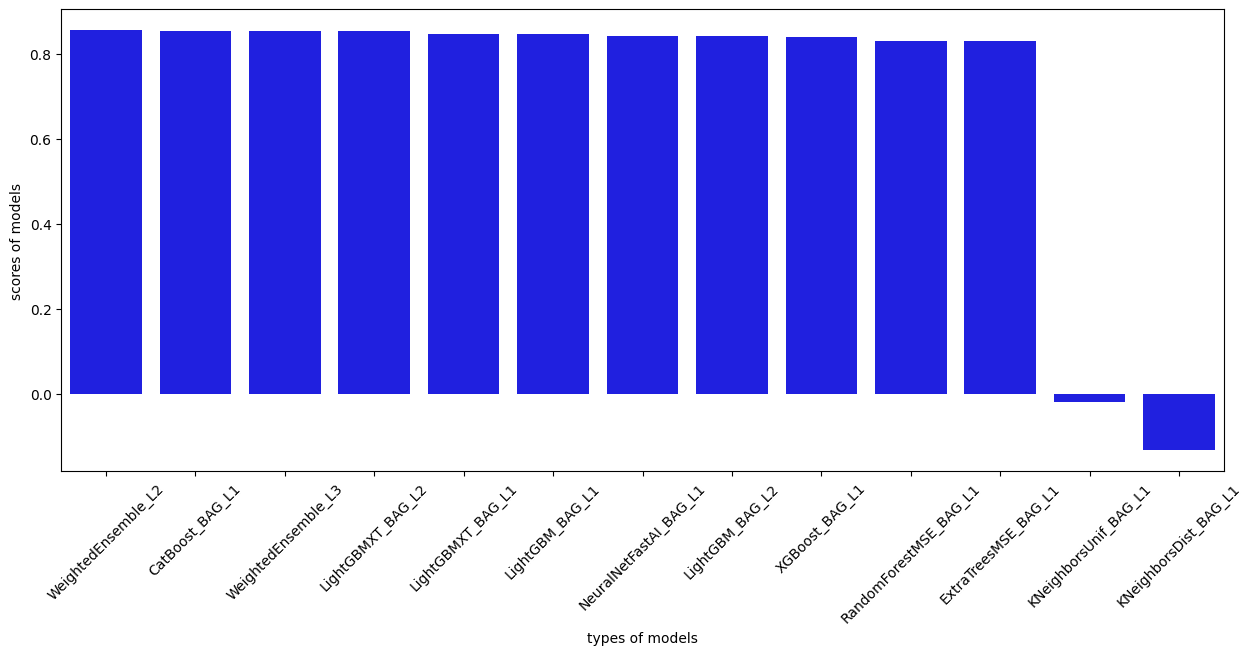

In [36]:
fig,axs = plt.subplots(figsize=(15,6))
sns.barplot(x='model',y='score_val',data=autogluon_predictor.leaderboard(),color='blue')
axs.set(xlabel='types of models',ylabel='scores of models')
plt.xticks(rotation=45)
plt.show()

In [37]:
autogluon_predictor.evaluate(x_test)

Evaluation: r2 on test data: 0.8804757411679206
Evaluations on test data:
{
    "r2": 0.8804757411679206,
    "root_mean_squared_error": -4341.583587710883,
    "mean_squared_error": -18849348.0490805,
    "mean_absolute_error": -2505.9144970954408,
    "pearsonr": 0.9410122947541203,
    "median_absolute_error": -1615.0259328125
}


{'r2': 0.8804757411679206,
 'root_mean_squared_error': -4341.583587710883,
 'mean_squared_error': -18849348.0490805,
 'mean_absolute_error': -2505.9144970954408,
 'pearsonr': 0.9410122947541203,
 'median_absolute_error': -1615.0259328125}

In [43]:
y_predict = autogluon_predictor.predict(x_test)
list(y_predict)[:5]

[4279.25732421875,
 13668.7197265625,
 14017.8564453125,
 46133.26171875,
 6327.7978515625]

In [40]:
y_test = x_test['charges']
y_test[:5]

470      2497.03830
193     12044.34200
1187    13844.79720
543     63770.42801
348      5478.03680
Name: charges, dtype: float64

In [47]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

MSE = mean_squared_error(y_test,y_predict).round(3)
RMSE = np.sqrt(MSE).round(3)
MAE = mean_absolute_error(y_test,y_predict).round(3)
r2_score = r2_score(y_test,y_predict).round(3)

print('MSE=',MSE,'RMSE=',RMSE,'MAE=',MAE,'r2_score=',r2_score)
print('maximum accuracy score among all models is=',r2_score)

MSE= 18849348.049 RMSE= 4341.584 MAE= 2505.914 r2_score= 0.88
maximum accuracy score among all models is= 0.88
